### 【問題1】べき乗の算術演算子を使用して作成
べき乗の算術演算子を使用したプログラムを作ってください。  

雛形として紙を1回折った時の厚さを計算するコードを用意しました。  

これを43回折った時のコードに書き換えてください。

```python
"""
紙を1回折った時の厚さを計算するコード
"""
THICKNESS = 0.00008
folded_thickness = THICKNESS*2
print("厚さ： {}メートル".format(folded_thickness))
```

In [73]:
THICKNESS = 0.00008
number_of_folds = 43
folded_thickness = THICKNESS*2**number_of_folds
print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


### 【問題2】単位の変換
単位がメートルだと実感が湧きづらいので、◯◯万キロメートル に変換して表示させてください。

サンプルとして ◯◯キロメートル に変換したコードを用意したので、参考にして取り組んでください。

小数点以下は2桁まで表示されるようにも指定しています。

```python
# メートルをキロメートルに変換して小数点以下2桁で表示する
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))

```



In [74]:
THICKNESS = 0.00008
number_of_folds = 43
folded_thickness = THICKNESS*2**number_of_folds
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))

厚さ： 703687.44キロメートル


### 【問題3】for文を使用して作成
次に、for文を使用したプログラムを作ってください。

べき乗の算術演算子は使ってはいけません。算術演算子は四則演算**（+、-、*、/）**のみ使えます。

《ヒント》

べき乗は以下のように掛け算の繰り返しに置き換えることができます。

$2^3=2×2×2\\
2^5=2×2×2×2×2$

In [75]:
THICKNESS = 0.00008
number_of_folds = 43
folded_thickness = THICKNESS

for _ in range(number_of_folds):
    folded_thickness *= 2
    
print("厚さ： {:.2f}キロメートル".format(folded_thickness/1000))

厚さ： 703687.44キロメートル


### 【問題4】計算時間の比較
2つの方法はどちらが正しいわけでもありませんが、コードの良さを評価する際には以下のような着目点があります。


* 計算速度
* メモリの使用量
* 可読性
* 拡張性
* 再利用性

今回は計算速度を比較してみます。以下の雛形を使用して、2つの方法の計算時間を出力してください。

そして、それぞれの計算時間の関係を簡単に説明してください。どちらの書き方が良さそうでしょうか。

なお、変数の定義やprint文など、どちらの方法でも使われている部分は除いた範囲の時間を比較してください。

**《雛形》**

timeモジュールを用いることで現在の時間を取得できます。比較したい箇所の前後の時間の差を計算することで、実行時間を求めます。

```python
import time
start = time.time()
#####
# ここに比較したいコードを貼り付ける
#####
elapsed_time = time.time() - start
print("time : {}[s]".format(elapsed_time))
```

In [124]:
import time
#べき乗計算の場合
start = time.time()

THICKNESS = 0.00008
number_of_folds = 1000
folded_thickness = THICKNESS*2**number_of_folds

elapsed_time = time.time() - start
print("べき乗計算による処理時間は : {:.10f}[s]".format(elapsed_time))


べき乗計算による処理時間は : 0.0000000000[s]


In [125]:
import time
#for文計算の場合
start = time.time()

THICKNESS = 0.00008
number_of_folds = 1000
folded_thickness = THICKNESS

for _ in range(number_of_folds):
    folded_thickness *= 2
    
elapsed_time = time.time() - start
print("for 文計算による処理時間は : {:.10f}[s]".format(elapsed_time))

for 文計算による処理時間は : 0.0000000000[s]


**《発展：マジックコマンドを使う》**

計算時間は実行するたびに変化します。そのため、複数回計測することが一般的です。timeモジュールとfor文を組み合わせることで実現できる他、

Jupyter Notebookでは%timeitという マジックコマンド でも計測が可能です。マジックコマンドはPythonのプログラムとは別に用意された、Jupyter 

Notebookを便利にするための機能です。

In [131]:
%%timeit
#####
THICKNESS = 0.00008
number_of_folds = 43
folded_thickness = THICKNESS*2**number_of_folds
#####

563 ns ± 172 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [130]:
%%timeit
#####
THICKNESS = 0.00008
number_of_folds = 43
folded_thickness = THICKNESS

for _ in range(number_of_folds):
    folded_thickness *= 2
#####

70.1 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 過程の可視化

折り曲げた時の厚さを毎回記録しておき、それを折れ線グラフで可視化してみます。


数式を一般化し、n回折った紙の厚さ $t_{n}$ は以下のように表せます。


$t_{n}$ = $t_{0}$ × $2^n$

これは指数関数です。指数関数は値が急激に増加する性質があります。厚さが急激に増えて月に到達する様子をグラフで見てみましょう。

### 【問題5】リストへの保存
ここまでは43回折った後の最後の値だけを使用していましたが、グラフで可視化するためには過程の値も必要です。

for文を使用したコードに、過程の値合計44個を記録するコードを加えてください。


《ヒント》

* 空のリストを作成する。
* 折る前の値をリストに追加する。
* for文の中でn回折った時の値をリストに追加していく。

最終的にリストに44個の値が格納されていることをlen関数を用いて確認しておきましょう。

In [165]:
THICKNESS = 0.00008

#n回折ったときのリストを作成する
thickness_list = [THICKNESS * 2 ** i for i in range(0, 44)]

#リストの格納数を確認
print(len(thickness_list))

44


### 【問題6】折れ線グラフの表示
グラフの描画には Matplotlib という ライブラリ を用います。

リストへ記録するコードの後ろで以下の雛形を使用してください。

```python
"""
グラフを表示する。タイトルと軸ラベル名付き。
"""
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(リスト名) # 「リスト名」のところにリストの変数名を入れる
plt.show()
```

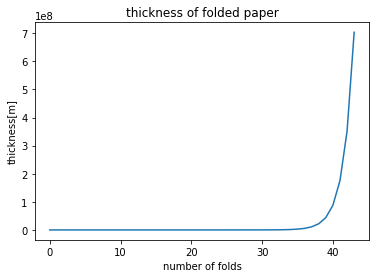

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(thickness_list) 
plt.show()

### 【問題7】グラフのカスタマイズ
グラフをより見やすくカスタマイズしてみましょう。カスタマイズしたグラフを最低3種類作成してください。

例えば以下のように書き換えることで、線の色を赤に変更できます。

《サンプルコード》

```python
"""
赤い折れ線グラフを表示する。
"""
plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(リスト名, color='red')
plt.show()
```
**<参考URL>**

<a href="https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.tick_params.html">matplotlib.pyplot.tick_params — Matplotlib 2.1.1 documentation

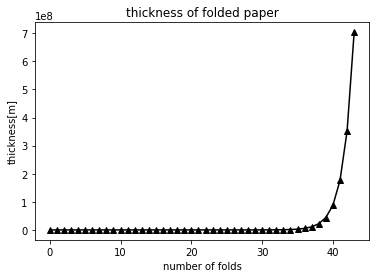

In [184]:
# △ マーカーを指定し黒色にしてみる

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(thickness_list, marker="^", color="black") 
plt.show()

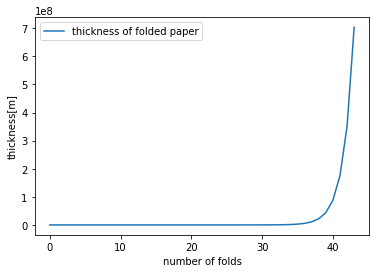

In [175]:
#タイトルの代わりに凡例をつける

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(thickness_list, label="thickness of folded paper") 
plt.legend()
plt.show()

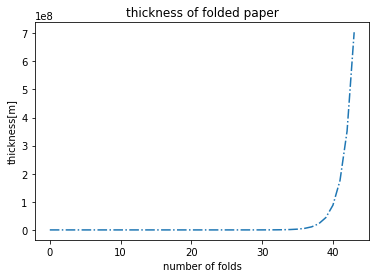

In [185]:
# 線の種類を点線にする

import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(thickness_list, linestyle="-.") 
plt.show()